In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose
from torch.utils.data import DataLoader

In [2]:


# Load Data

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform=Compose( [ToTensor(), torch.flatten]), 
    download = True           
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = Compose( [ToTensor(), torch.flatten]),
    download = True 
)

In [3]:
# Decrease training data to 6000 and repack it
training_index = np.zeros(6000)
ytrain_count = np.zeros(10)

pics_limit = 600
count = 0
for i in range(len(train_data)):
    if ytrain_count[train_data[i][1]] < pics_limit: 
        training_index[count] = i
        count +=1
        ytrain_count[train_data[i][1]] +=1
        

In [4]:

train_data = DataLoader(train_data,sampler=torch.tensor(training_index).long(), batch_size=16,num_workers=0)
test_data = DataLoader(test_data,num_workers=0)

In [5]:
len(train_data)

375

In [6]:

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(), 
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    def forward(self, x):
        out = self.mlp(x)
        return out




In [7]:
n_epochs = 20
train_loss_record = np.zeros(n_epochs)
test_loss_record = np.zeros(n_epochs)
train_acc_record = np.zeros(n_epochs) 
test_acc_record = np.zeros(n_epochs)
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1,momentum = 0.9)
criterion = nn.CrossEntropyLoss()

In [8]:
#

for epoch in range(n_epochs):
    # Monitor training loss
    train_loss = 0.0
    test_loss = 0.0
    train_acc = 0
    test_acc = 0
    # Prep model for training
    model.train() 
    for data, target in train_data:
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        _, predicted = torch.max(output, dim=1)
        # Calculate the loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update running training loss
        train_loss += loss.item()*data.size(0)
        
        train_acc += (predicted == target).sum().item()
        

    # Prep model for evaluation
    model.eval() 
    for data, target in test_data:
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        _, predicted = torch.max(output, dim=1)
        # Calculate the loss
        loss = criterion(output, target)
        # Update running validation loss 
        test_loss += loss.item()*data.size(0)
        test_acc += (predicted == target).sum().item()
    # Print training/validation statistics 
    # Calculate average loss over an epoch
    train_loss_record[epoch] = train_loss/6000
    test_loss_record[epoch] = test_loss/len(test_data.dataset)
    train_acc_record[epoch] = train_acc/6000
    test_acc_record[epoch] = test_acc/len(test_data.dataset)
#     print('Epoch: {} \tTraining Loss: {:.6f} \test Loss: {:.6f}'.format(
#         epoch+1, 
#         train_loss,
#         test_loss
#         ))
    

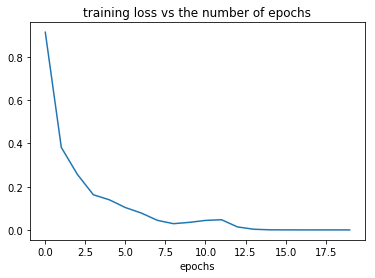

In [9]:
plt.plot(train_loss_record)
plt.title('training loss vs the number of epochs')
plt.xlabel('epochs')
plt.show()

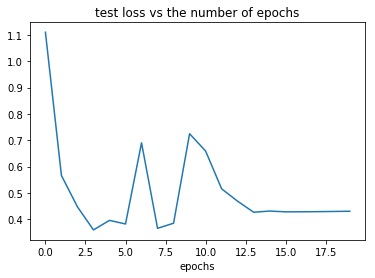

In [10]:
plt.plot(test_loss_record)
plt.title('test loss vs the number of epochs')
plt.xlabel('epochs')
plt.show()

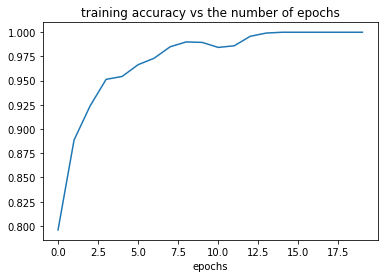

In [11]:
plt.plot(train_acc_record)
plt.title('training accuracy vs the number of epochs')
plt.xlabel('epochs')
plt.show()

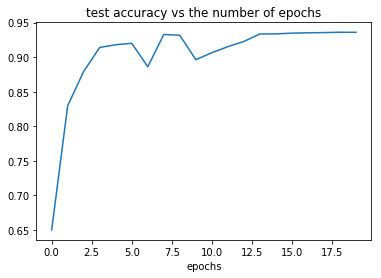

In [12]:
plt.plot(test_acc_record)
plt.title('test accuracy vs the number of epochs')
plt.xlabel('epochs')
plt.show()